In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


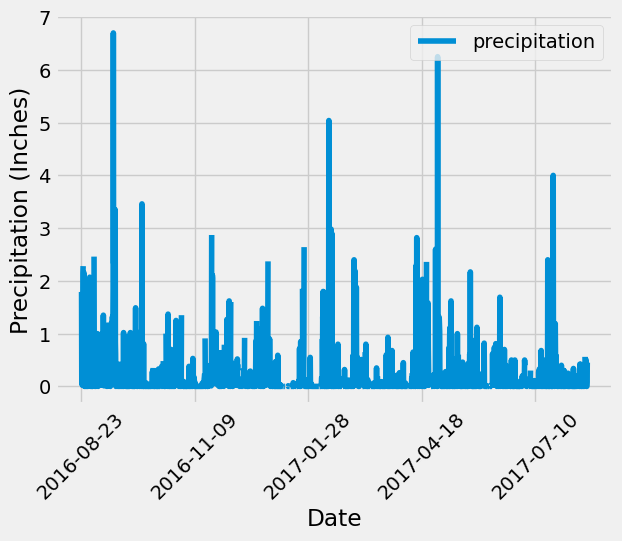

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prior_year= dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prior_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names.
prior_year_precipitation_df = pd.DataFrame(results, columns=("date","precipitation"))

# Sort the dataframe by date.
date_sorted_df = prior_year_precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data.
date_sorted_df.plot(x='date',y='precipitation',rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.legend(loc='upper right')

# Rotate the x-axis label by 45 degrees.
plt.xticks(rotation=45)

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_sorted_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
print(station_count)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Design a query to find the most active station and print it)
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

print("The most active station is:", most_active_station[0])

The most active station is: USC00519281


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(func.min(Measurement.tobs).label('lowest_temperature'),
                                  func.max(Measurement.tobs).label('highest_temperature'),
                                  func.avg(Measurement.tobs).label('average_temperature')).\
        filter(Measurement.station == 'USC00519281').all()

lowest_temp = temperature_stats[0].lowest_temperature
highest_temp = temperature_stats[0].highest_temperature
avg_temp = temperature_stats[0].average_temperature

print("Lowest Temperature:", lowest_temp)
print("Highest Temperature:", highest_temp)
print("Average Temperature:", avg_temp)

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


Text(16.03333333333333, 0.5, 'Frequency (# Days)')

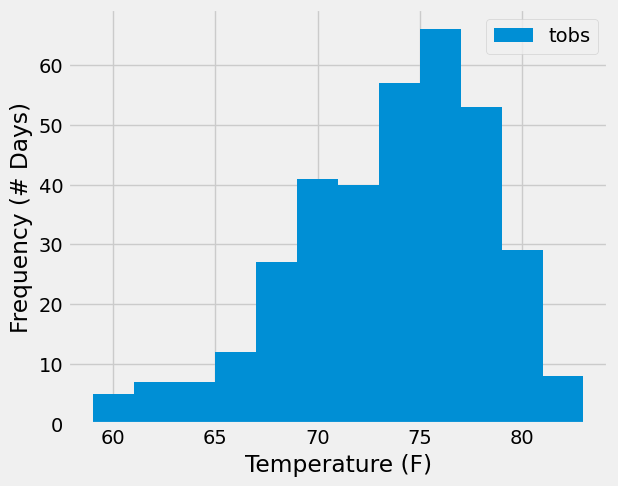

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table

prior_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prior_year).all()
    
df= pd.DataFrame(results, columns = ['tobs'])
df.plot.hist(bins = 12)
plt.tight_layout()
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency (# Days)")

# Close Session

In [18]:
# Close Session
session.close()